## Problem 6: Linear Regression

In [90]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import io

%matplotlib inline

HOUSING_DATA_PATH = "data/housing_data.mat"

In [94]:
def solveLeastSquares(A, b):
    return np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), b)

In [4]:
housing_data = io.loadmat(HOUSING_DATA_PATH)

In [45]:
xTrain = housing_data['Xtrain']
yTrain = housing_data['Ytrain']
xValidate = housing_data['Xvalidate']
yValidate = housing_data['Yvalidate']

# Appending 1 to end of each data point to add bias term
xTrain = np.insert(xTrain, xTrain.shape[1], 1, 1)
xValidate = np.insert(xValidate, xValidate.shape[1], 1, 1)
assert xTrain.shape[1] == 9
assert xValidate.shape[1] == 9

In [97]:
# Train model
xModel = solveLeastSquares(xTrain, yTrain)
yValidatePredicted = np.dot(xValidate, xModel)

In [98]:
residualValidate = np.linalg.norm(yValidatePredicted - yValidate) ** 2
minY, maxY = np.min(yValidatePredicted), np.max(yValidatePredicted)

### Part 2
The residual sum of squares of the validation set is **5.79495379767e+12**.  
The predicted values range from **-56562.8275449** to **710798.838692**.  
The range doesn't make sense, since housing prices cannot be negative; the linear model doesn't account for this, however.

### Part 3

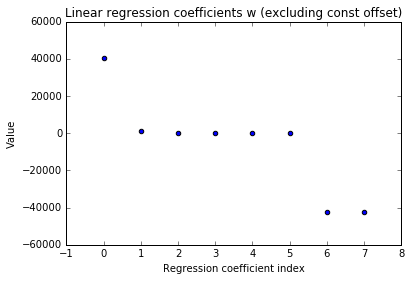

In [100]:
plt.xlabel("Regression coefficient index")
plt.ylabel("Value")
plt.title("Linear regression coefficients w (excluding const offset)")
plt.scatter(np.arange(xModel.shape[0] - 1), xModel[:-1])

### Part 4

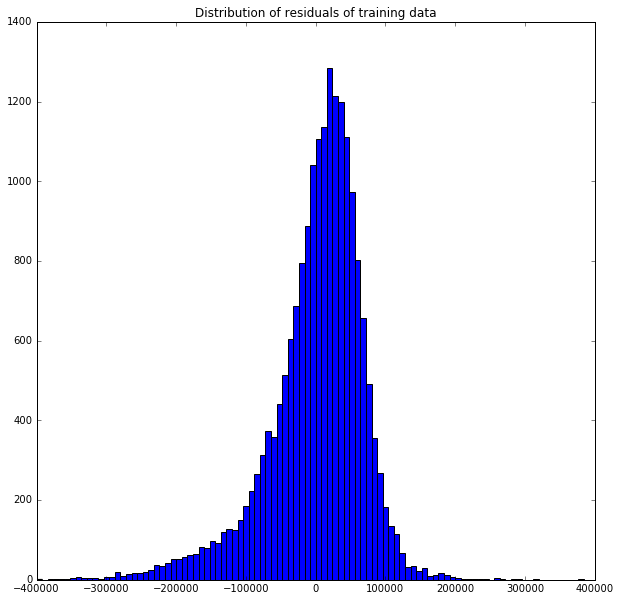

In [105]:
yTrainingPredicted = np.dot(xTrain, xModel)
residualsTraining = yTrainingPredicted - yTrain

plt.figure(1, figsize=(10, 10))
plt.title("Distribution of residuals of training data")
n, bins, patches = plt.hist(residualsTraining, bins=100, \
                            range=(-400000, 400000))

It is clear that the histogram very much resembles a normal distribution, although a little skewed to the right (having a long left tail).